## Capstone 2 - Abalone Age Prediction
### Exploratory Data Analysis
**Context**:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

_Credit: https://www.kaggle.com/rodolfomendes/abalone-dataset_

**Goal**: The goal of this capstone project is to build a regression model that can predict the age of an abalone shell by accurately predicting its ring count.


**Data Wrangling Objective**: Explore the data relationships of all the features and understand how the
features compare to the response variable.


In [106]:
#Import pandas, matplotlib.pyplot, seaborn, numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [107]:
#Import clean abalone dataset
abalone_data = pd.read_csv('/Users/joyopsvig/github/springboard/2-CapstoneAbalone/Notebooks/abaloneDW_cleaned.csv')

In [108]:
#Call head method to print first several rows of data
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

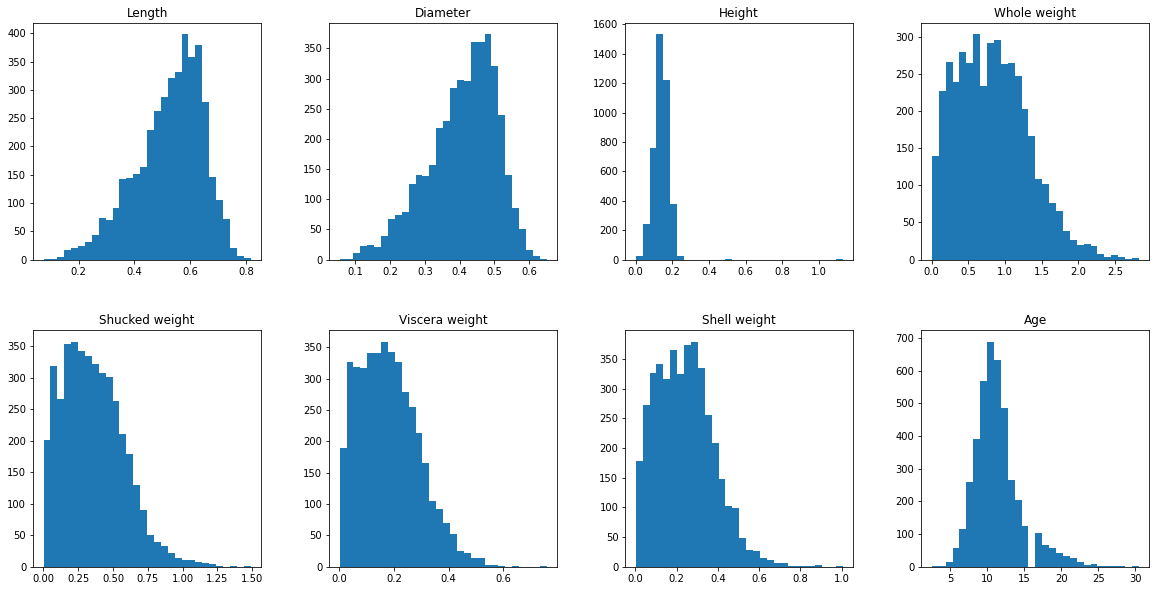

In [109]:
#Call histograms to view distribution of data
abalone_data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

<AxesSubplot:xlabel='Sex', ylabel='count'>

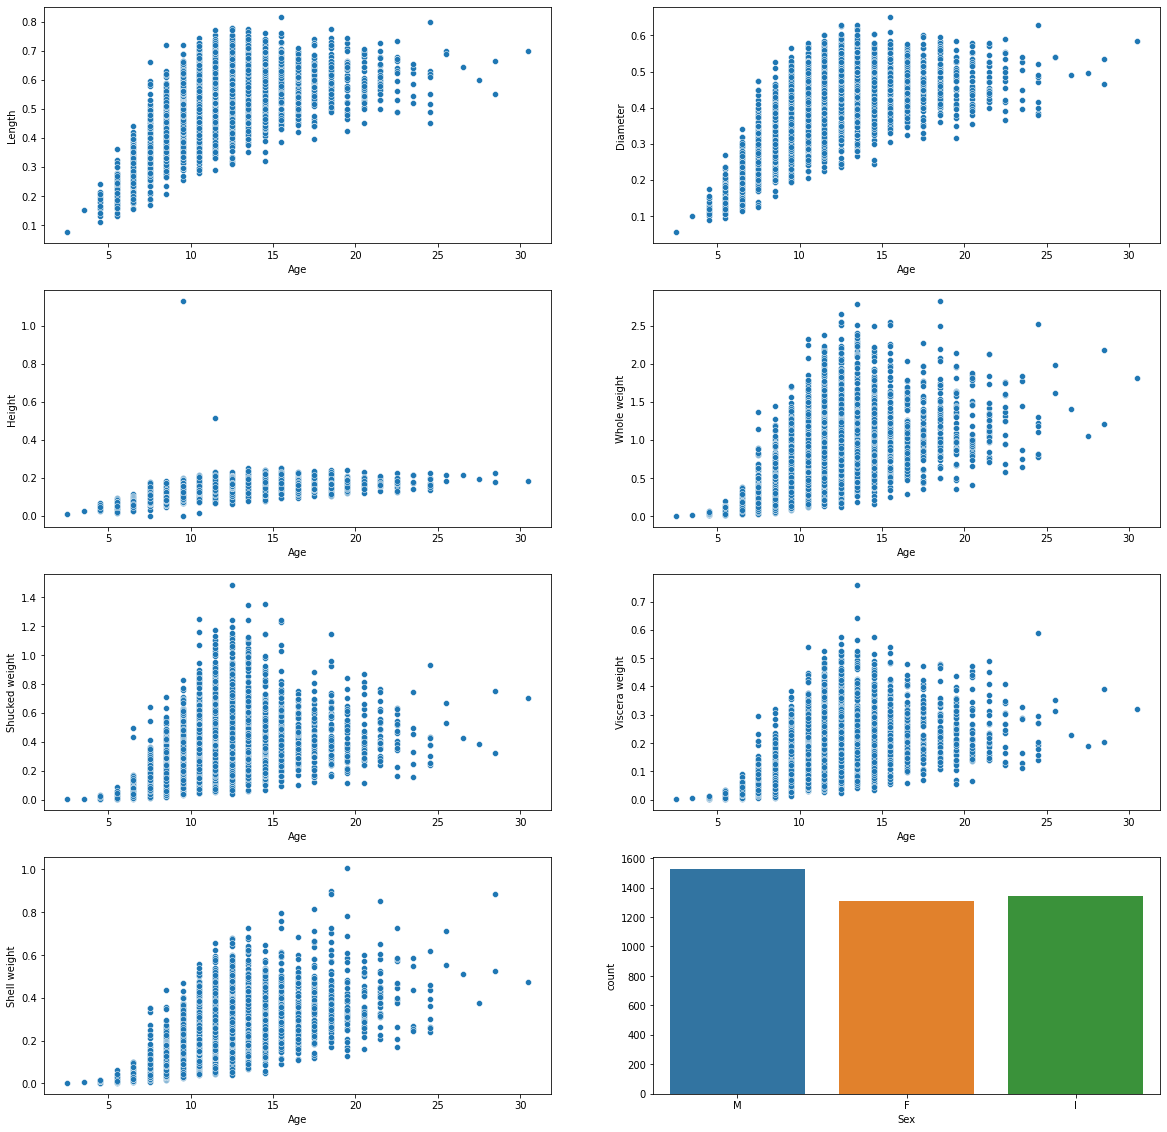

In [110]:
#Call plots to view Age vs. columns
fig_dims = (20, 20)
fig, ax = plt.subplots(4,2, figsize=fig_dims)
sns.scatterplot(data=abalone_data, x='Age', y='Length', ax=ax[0,0])
sns.scatterplot(data=abalone_data, x='Age', y='Diameter', ax=ax[0,1])
sns.scatterplot(data=abalone_data, x='Age', y='Height', ax=ax[1,0])
sns.scatterplot(data=abalone_data, x='Age', y='Whole weight', ax=ax[1,1])
sns.scatterplot(data=abalone_data, x='Age', y='Shucked weight', ax=ax[2,0])
sns.scatterplot(data=abalone_data, x='Age', y='Viscera weight', ax=ax[2,1])
sns.scatterplot(data=abalone_data, x='Age', y='Shell weight', ax=ax[3,0])
sns.countplot(data=abalone_data, x='Sex', ax=ax[3,1])

Reviewing the above graphs, it appears that abalones typically reach their peak height and weight around 12-15 years old, and then their weight and diameter measurements start to decline.

In reviewing the age vs. height scatter plot, it appears there are potentially two outliers - two abalones with significantly higher heights compared to the others.

In [111]:
#Review the two heights for abalone which appear to be significantly high
abalone_data[abalone_data['Height'] > 0.4]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,11.5
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,9.5


In [112]:
#Call summary statistics on abalone data to understand how the two height outliers compare to rest of data
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


The first abalone with a significantly higher height comparatively (row 1417) appears to also have much higher weight values compared to the mean value across all categories, implying this is a very big and heavy abalone.

The second abalone with a significantly higher height comparatively (row 2051) appears to have comparable weights across all categories except for the shell weight, which implies that this abalone has a very big shell but not very much meat.

Because these two abalones are outliers compared to the rest of the abalones in the dataset, I will remove them below.

It's also evident from the summary statistics that the height of one of the abalone shells is 0 which is important to look into.

In [113]:
#Remove outlier abalones from dataset
abalone_data.drop([1417, 2051], inplace = True)

In [114]:
#Confirm two outlier abalones are removed
abalone_data[abalone_data['Height'] > 0.4]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age


In [115]:
#Review which abalones have a height measurement of 0
abalone_data[abalone_data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


It's unclear why these two abalones have a height of zero, but I will input the average height value into both rows, and then continue to include them in the data analysis given they are not missing any other key data points.

In [116]:
#Add avg (mean) height values for the two abalones missing height measurements
abalone_data.loc[1257, 'Height'] = 0.139
abalone_data.loc[3996, 'Height'] = 0.139

In [117]:
#Confirm 1257 height values are updated
abalone_data.loc[1257]

Sex                    I
Length              0.43
Diameter            0.34
Height             0.139
Whole weight       0.428
Shucked weight    0.2065
Viscera weight     0.086
Shell weight       0.115
Age                  9.5
Name: 1257, dtype: object

In [118]:
#Confirm 3996 height values are updated
abalone_data.loc[3996]

Sex                    I
Length             0.315
Diameter            0.23
Height             0.139
Whole weight       0.134
Shucked weight    0.0575
Viscera weight    0.0285
Shell weight      0.3505
Age                  7.5
Name: 3996, dtype: object

In [119]:
#Review how the categories compare across the different sexes of abalones
abalone_data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age']].mean().sort_values('Age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
I,0.427746,0.326494,0.108203,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561297,0.439204,0.151143,0.990661,0.432504,0.215367,0.281819,12.205959
F,0.579188,0.454809,0.157266,1.046879,0.446275,0.230776,0.302139,12.631700


Infant abalones are shorter and weigh less across all categories, on average, than male and female abalones. On average, female abalones live longer and are longer and weigh slightly more across all categories than male abalones.

In [120]:
#Call correlation to investigate correlations between variables
abalone_data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986804,0.900479,0.925372,0.898184,0.903091,0.897648,0.556827
Diameter,0.986804,1.000000,0.906790,0.925537,0.893385,0.899768,0.905271,0.574792
Height,0.900479,0.906790,1.000000,0.888568,0.837255,0.866483,0.891704,0.609974
Whole weight,0.925372,0.925537,0.888568,1.000000,0.969386,0.966311,0.955385,0.540859
Shucked weight,0.898184,0.893385,0.837255,0.969386,1.000000,0.931868,0.882681,0.421442
Viscera weight,0.903091,0.899768,0.866483,0.966311,0.931868,1.000000,0.907603,0.504234
Shell weight,0.897648,0.905271,0.891704,0.955385,0.882681,0.907603,1.000000,0.627815
Age,0.556827,0.574792,0.609974,0.540859,0.421442,0.504234,0.627815,1.000000


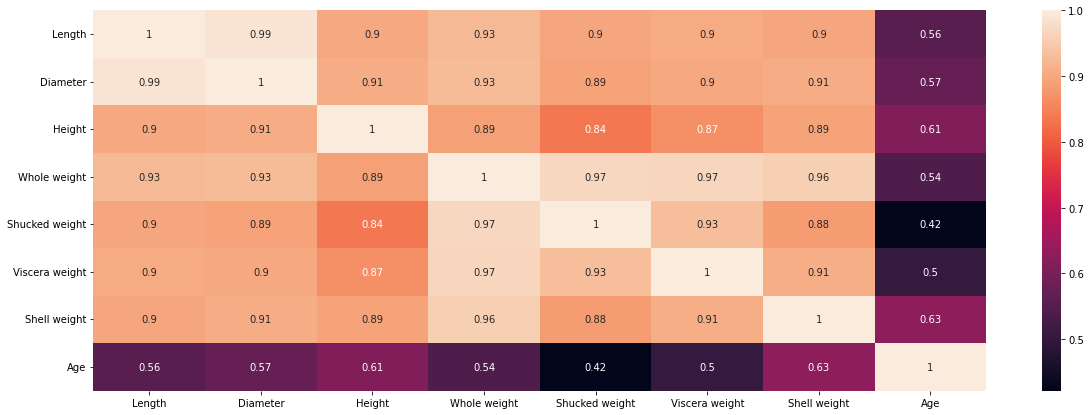

In [121]:
#Review correlation in a heatmap
plt.figure(figsize=(20,7))
sns.heatmap(abalone_data.corr(), annot=True);

From the correlation table and heatmap, it appears whole weight is highly correlated across the various features, understandably. Age is most correlated with height and shell weight and least correlated with shucked weight.

In [130]:
abalone_data.to_csv('abaloneEDA_cleaned.csv', index=False)